In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [7]:
base_meta_file = os.path.join('resources')
image_files = os.path.join('images')

In [8]:
print(os.path.splitext(os.path.basename(image_files))[0])
for x in glob(os.path.join(image_files,'*.jpg')):
    print(x)

images
images/ISIC_0030858.jpg
images/ISIC_0030680.jpg
images/ISIC_0033389.jpg
images/ISIC_0032097.jpg
images/ISIC_0032929.jpg
images/ISIC_0026784.jpg
images/ISIC_0028971.jpg
images/ISIC_0026948.jpg
images/ISIC_0026790.jpg
images/ISIC_0028965.jpg
images/ISIC_0025299.jpg
images/ISIC_0032083.jpg
images/ISIC_0024839.jpg
images/ISIC_0030694.jpg
images/ISIC_0024811.jpg
images/ISIC_0030864.jpg
images/ISIC_0026960.jpg
images/ISIC_0028795.jpg
images/ISIC_0032915.jpg
images/ISIC_0032901.jpg
images/ISIC_0026974.jpg
images/ISIC_0028781.jpg
images/ISIC_0028959.jpg
images/ISIC_0030870.jpg
images/ISIC_0024805.jpg
images/ISIC_0032054.jpg
images/ISIC_0025528.jpg
images/ISIC_0024636.jpg
images/ISIC_0030643.jpg
images/ISIC_0026021.jpg
images/ISIC_0029312.jpg
images/ISIC_0026747.jpg
images/ISIC_0029474.jpg
images/ISIC_0027459.jpg
images/ISIC_0030125.jpg
images/ISIC_0032732.jpg
images/ISIC_0033438.jpg
images/ISIC_0032726.jpg
images/ISIC_0026753.jpg
images/ISIC_0029460.jpg
images/ISIC_0030131.jpg
images/IS

images/ISIC_0026392.jpg
images/ISIC_0031836.jpg
images/ISIC_0028354.jpg
images/ISIC_0027067.jpg
images/ISIC_0031605.jpg
images/ISIC_0026379.jpg
images/ISIC_0025670.jpg
images/ISIC_0033012.jpg
images/ISIC_0033774.jpg
images/ISIC_0025116.jpg
images/ISIC_0031163.jpg
images/ISIC_0028432.jpg
images/ISIC_0027701.jpg
images/ISIC_0031177.jpg
images/ISIC_0029738.jpg
images/ISIC_0028426.jpg
images/ISIC_0030269.jpg
images/ISIC_0027715.jpg
images/ISIC_0033760.jpg
images/ISIC_0025102.jpg
images/ISIC_0025664.jpg
images/ISIC_0032318.jpg
images/ISIC_0033006.jpg
images/ISIC_0028340.jpg
images/ISIC_0027073.jpg
images/ISIC_0031611.jpg
images/ISIC_0032330.jpg
images/ISIC_0024552.jpg
images/ISIC_0025894.jpg
images/ISIC_0030527.jpg
images/ISIC_0028368.jpg
images/ISIC_0026345.jpg
images/ISIC_0029076.jpg
images/ISIC_0031639.jpg
images/ISIC_0026423.jpg
images/ISIC_0029710.jpg
images/ISIC_0030241.jpg
images/ISIC_0034027.jpg
images/ISIC_0033748.jpg
images/ISIC_0032456.jpg
images/ISIC_0033990.jpg
images/ISIC_0034

images/ISIC_0031649.jpg
images/ISIC_0026335.jpg
images/ISIC_0031891.jpg
images/ISIC_0030557.jpg
images/ISIC_0028318.jpg
images/ISIC_0024522.jpg
images/ISIC_0032340.jpg
images/ISIC_0032426.jpg
images/ISIC_0034057.jpg
images/ISIC_0033738.jpg
images/ISIC_0030231.jpg
images/ISIC_0027995.jpg
images/ISIC_0029760.jpg
images/ISIC_0026453.jpg
images/ISIC_0028495.jpg
images/ISIC_0029953.jpg
images/ISIC_0028481.jpg
images/ISIC_0029947.jpg
images/ISIC_0034080.jpg
images/ISIC_0033937.jpg
images/ISIC_0027942.jpg
images/ISIC_0026484.jpg
images/ISIC_0031846.jpg
images/ISIC_0030580.jpg
images/ISIC_0032397.jpg
images/ISIC_0033089.jpg
images/ISIC_0025833.jpg
images/ISIC_0032383.jpg
images/ISIC_0025827.jpg
images/ISIC_0031852.jpg
images/ISIC_0030594.jpg
images/ISIC_0027956.jpg
images/ISIC_0026490.jpg
images/ISIC_0034094.jpg
images/ISIC_0025199.jpg
images/ISIC_0033923.jpg
images/ISIC_0033664.jpg
images/ISIC_0024318.jpg
images/ISIC_0025006.jpg
images/ISIC_0031073.jpg
images/ISIC_0027611.jpg
images/ISIC_0028

images/ISIC_0026287.jpg
images/ISIC_0031923.jpg
images/ISIC_0027199.jpg
images/ISIC_0028282.jpg
images/ISIC_0029822.jpg
images/ISIC_0029836.jpg
images/ISIC_0029188.jpg
images/ISIC_0028296.jpg
images/ISIC_0032741.jpg
images/ISIC_0032999.jpg
images/ISIC_0030156.jpg
images/ISIC_0028719.jpg
images/ISIC_0026734.jpg
images/ISIC_0029407.jpg
images/ISIC_0031248.jpg
images/ISIC_0026052.jpg
images/ISIC_0029361.jpg
images/ISIC_0030630.jpg
images/ISIC_0033339.jpg
images/ISIC_0024645.jpg
images/ISIC_0032027.jpg
images/ISIC_0024651.jpg
images/ISIC_0032033.jpg
images/ISIC_0024889.jpg
images/ISIC_0026046.jpg
images/ISIC_0029375.jpg
images/ISIC_0027358.jpg
images/ISIC_0030624.jpg
images/ISIC_0030142.jpg
images/ISIC_0026720.jpg
images/ISIC_0029413.jpg
images/ISIC_0032755.jpg
images/ISIC_0025229.jpg
images/ISIC_0028725.jpg
images/ISIC_0027416.jpg
images/ISIC_0031274.jpg
images/ISIC_0026708.jpg
images/ISIC_0025201.jpg
images/ISIC_0033463.jpg
images/ISIC_0024679.jpg
images/ISIC_0033305.jpg
images/ISIC_0025

images/ISIC_0028922.jpg
images/ISIC_0029382.jpg
images/ISIC_0027344.jpg
images/ISIC_0030638.jpg
images/ISIC_0028077.jpg
images/ISIC_0029369.jpg
images/ISIC_0031526.jpg
images/ISIC_0024895.jpg
images/ISIC_0025553.jpg
images/ISIC_0033331.jpg
images/ISIC_0032991.jpg
images/ISIC_0033457.jpg
images/ISIC_0032749.jpg
images/ISIC_0025235.jpg
images/ISIC_0031240.jpg
images/ISIC_0027422.jpg
images/ISIC_0028711.jpg
images/ISIC_0026728.jpg
images/ISIC_0031254.jpg
images/ISIC_0027436.jpg
images/ISIC_0028705.jpg
images/ISIC_0032985.jpg
images/ISIC_0033443.jpg
images/ISIC_0025221.jpg
images/ISIC_0024881.jpg
images/ISIC_0025547.jpg
images/ISIC_0033325.jpg
images/ISIC_0024659.jpg
images/ISIC_0027350.jpg
images/ISIC_0028063.jpg
images/ISIC_0031532.jpg
images/ISIC_0032013.jpg
images/ISIC_0024671.jpg
images/ISIC_0030604.jpg
images/ISIC_0027378.jpg
images/ISIC_0029355.jpg
images/ISIC_0026066.jpg
images/ISIC_0029433.jpg
images/ISIC_0026700.jpg
images/ISIC_0030162.jpg
images/ISIC_0034304.jpg
images/ISIC_0025

images/ISIC_0029916.jpg
images/ISIC_0031181.jpg
images/ISIC_0029902.jpg
images/ISIC_0031195.jpg
images/ISIC_0033782.jpg
images/ISIC_0024598.jpg
images/ISIC_0025686.jpg
images/ISIC_0027091.jpg
images/ISIC_0025876.jpg
images/ISIC_0029094.jpg
images/ISIC_0031803.jpg
images/ISIC_0027907.jpg
images/ISIC_0033972.jpg
images/ISIC_0033966.jpg
images/ISIC_0027913.jpg
images/ISIC_0029080.jpg
images/ISIC_0031817.jpg
images/ISIC_0025862.jpg
images/ISIC_0025651.jpg
images/ISIC_0033033.jpg
images/ISIC_0025889.jpg
images/ISIC_0028375.jpg
images/ISIC_0027046.jpg
images/ISIC_0031624.jpg
images/ISIC_0026358.jpg
images/ISIC_0031142.jpg
images/ISIC_0028413.jpg
images/ISIC_0027720.jpg
images/ISIC_0033755.jpg
images/ISIC_0025137.jpg
images/ISIC_0033741.jpg
images/ISIC_0025123.jpg
images/ISIC_0033999.jpg
images/ISIC_0029719.jpg
images/ISIC_0031156.jpg
images/ISIC_0030248.jpg
images/ISIC_0028407.jpg
images/ISIC_0027734.jpg
images/ISIC_0028361.jpg
images/ISIC_0027052.jpg
images/ISIC_0031630.jpg
images/ISIC_0025

In [9]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(image_files, '*.jpg'))}

### Leision Types

##### nv
Melanocytic nevi are benign neoplasms of melanocytes and appear in a myriad of variants, which all are included in our series. The variants may differ significantly from a dermatoscopic point of view.

##### mel
Melanoma is a malignant neoplasm derived from melanocytes that may appear in different variants. If excised in an early stage it can be cured by simple surgical excision. Melanomas can be invasive or non-invasive (in situ). We included all variants of melanoma including melanoma in situ, but did exclude non-pigmented, subungual, ocular or mucosal melanoma.

##### bkl
"Benign keratosis" is a generic class that includes seborrheic ker- atoses ("senile wart"), solar lentigo - which can be regarded a flat variant of seborrheic keratosis - and lichen-planus like keratoses (LPLK), which corresponds to a seborrheic keratosis or a solar lentigo with inflammation and regression. 

##### bcc
Basal cell carcinoma is a common variant of epithelial skin cancer that rarely metastasizes but grows destructively if untreated. It appears in different morphologic variants (flat, nodular, pigmented, cystic, etc), which are all included in this set.

##### akiec
Actinic Keratoses (Solar Keratoses) and intraepithelial Carcinoma (Bowen’s disease) are common non-invasive, variants of squamous cell car- cinoma that can be treated locally without surgery. Some authors regard them as precursors of squamous cell carcinomas and not as actual carci- nomas. 

##### vasc
Vascular skin lesions in the dataset range from cherry angiomas to angiokeratomas and pyogenic granulomas. Hemorrhage is also included in this category.

##### df
Dermatofibroma is a benign skin lesion regarded as either a benign proliferation or an inflammatory reaction to minimal trauma. It is brown often showing a central zone of fibrosis dermatoscopically.

In [10]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'dermatofibroma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [11]:
tile_df = pd.read_csv(os.path.join(base_meta_file, 'HAM10000_metadata.csv'))
tile_df['path'] = tile_df['image_id'].map(imageid_path_dict.get)
tile_df['cell_type'] = tile_df['dx'].map(lesion_type_dict.get) 
tile_df['cell_type_idx'] = pd.Categorical(tile_df['cell_type']).codes
tile_df.sample(3)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
9725,HAM_0004376,ISIC_0024843,akiec,histo,70.0,female,face,images/ISIC_0024843.jpg,Actinic keratoses,0
6059,HAM_0003024,ISIC_0024768,nv,follow_up,35.0,female,trunk,images/ISIC_0024768.jpg,Melanocytic nevi,4
4540,HAM_0001659,ISIC_0026564,nv,follow_up,35.0,male,lower extremity,images/ISIC_0026564.jpg,Melanocytic nevi,4


In [12]:
tile_df.describe(exclude=[np.number])

,lesion_id,image_id,dx,dx_type,sex,localization,path,cell_type
count,10015,10015,10015,10015,10015,10015,10015,10015
unique,7470,10015,7,4,3,15,10015,7
top,HAM_0005263,ISIC_0028878,nv,histo,male,back,images/ISIC_0024594.jpg,Melanocytic nevi
freq,6,1,6705,5340,5406,2192,1,6705


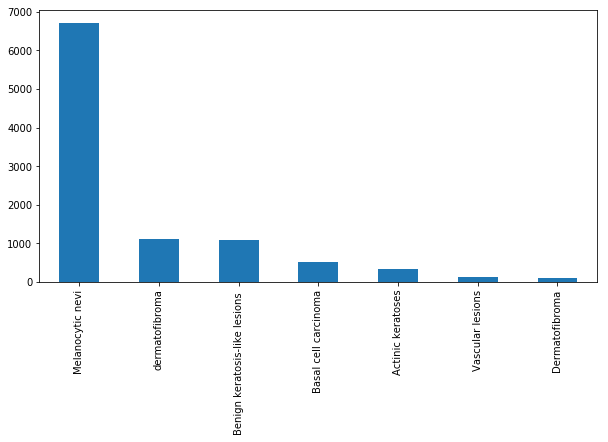

In [13]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
tile_df['cell_type'].value_counts().plot(kind='bar', ax=ax1)

In [ ]:
# Create a new directory
base_dir = 'base_dir'
os.mkdir(base_dir)

In [ ]:
#[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)


# [CREATE FOLDERS INSIDE THE TRAIN, VALIDATION AND TEST FOLDERS]
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
nv = os.path.join(train_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(train_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(train_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(train_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(train_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(train_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(train_dir, 'df')
os.mkdir(df)



# create new folders inside val_dir
nv = os.path.join(val_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(val_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(val_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(val_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(val_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(val_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(val_dir, 'df')
os.mkdir(df)

In [14]:
df_data = pd.read_csv('resources/HAM10000_metadata.csv')

df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [40]:
tile_df.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
path              0
cell_type         0
cell_type_idx     0
dtype: int64

In [41]:
tile_df['age'].fillna((tile_df['age'].mean()), inplace=True)

In [42]:
tile_df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
path             0
cell_type        0
cell_type_idx    0
dtype: int64

In [43]:
# this will tell us how many images are associated with each lesion_id
df = tile_df.groupby('lesion_id').count()

# now we filter out lesion_id's that have only one image associated with it
df = df[df['image_id'] == 1]

df.reset_index(inplace=True)

df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000001,1,1,1,1,1,1,1,1,1
1,HAM_0000003,1,1,1,1,1,1,1,1,1
2,HAM_0000004,1,1,1,1,1,1,1,1,1
3,HAM_0000007,1,1,1,1,1,1,1,1,1
4,HAM_0000008,1,1,1,1,1,1,1,1,1


In [44]:
# here we identify lesion_id's that have duplicate images and those that have only
# one image.

def identify_duplicates(x):
    
    unique_list = list(df['lesion_id'])
    
    if x in unique_list:
        return 'no_duplicates'
    else:
        return 'has_duplicates'
    
# create a new colum that is a copy of the lesion_id column
tile_df['duplicates'] = tile_df['lesion_id']
# apply the function to this new column
tile_df['duplicates'] = tile_df['duplicates'].apply(identify_duplicates)

tile_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,images/ISIC_0027419.jpg,Benign keratosis-like lesions,2,has_duplicates
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,images/ISIC_0025030.jpg,Benign keratosis-like lesions,2,has_duplicates
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,images/ISIC_0026769.jpg,Benign keratosis-like lesions,2,has_duplicates
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,images/ISIC_0025661.jpg,Benign keratosis-like lesions,2,has_duplicates
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,images/ISIC_0031633.jpg,Benign keratosis-like lesions,2,has_duplicates


In [45]:
tile_df['duplicates'].value_counts()

no_duplicates     5514
has_duplicates    4501
Name: duplicates, dtype: int64

In [46]:
# now we filter out images that don't have duplicates
df = tile_df[tile_df['duplicates'] == 'no_duplicates']

df.shape

(5514, 11)

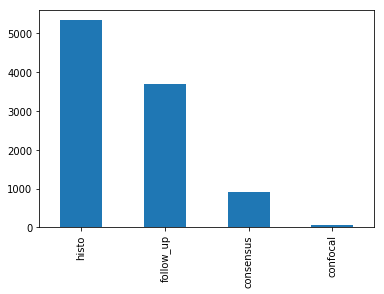

In [47]:
tile_df['dx_type'].value_counts().plot(kind='bar')

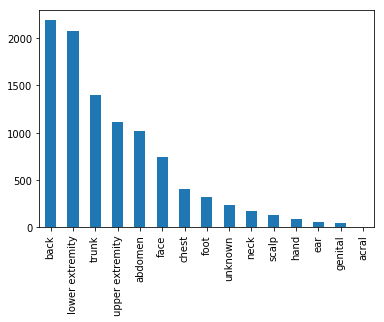

In [48]:
tile_df['localization'].value_counts().plot(kind='bar')

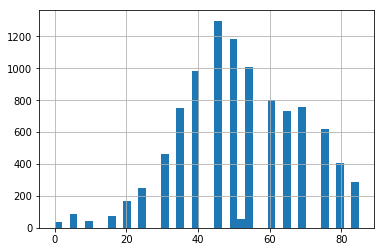

In [49]:
tile_df['age'].hist(bins=40)

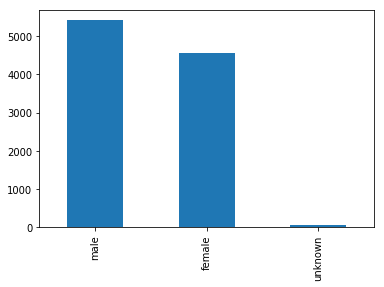

In [50]:
tile_df['sex'].value_counts().plot(kind='bar')

In [51]:
sns.scatterplot(x='age', y='dx',data=tile_df)

AttributeError: module 'seaborn' has no attribute 'scatterplot'

## Loading and Resizing

In [54]:
tile_df['image'] = tile_df['path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

In [55]:
tile_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,duplicates,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,images/ISIC_0027419.jpg,Benign keratosis-like lesions,2,has_duplicates,"[[[191, 153, 194], [191, 154, 198], [189, 152,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,images/ISIC_0025030.jpg,Benign keratosis-like lesions,2,has_duplicates,"[[[23, 13, 22], [25, 15, 24], [24, 16, 31], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,images/ISIC_0026769.jpg,Benign keratosis-like lesions,2,has_duplicates,"[[[186, 126, 136], [190, 136, 149], [195, 137,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,images/ISIC_0025661.jpg,Benign keratosis-like lesions,2,has_duplicates,"[[[24, 11, 18], [27, 13, 26], [39, 23, 33], [6..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,images/ISIC_0031633.jpg,Benign keratosis-like lesions,2,has_duplicates,"[[[136, 91, 114], [148, 104, 127], [161, 117, ..."


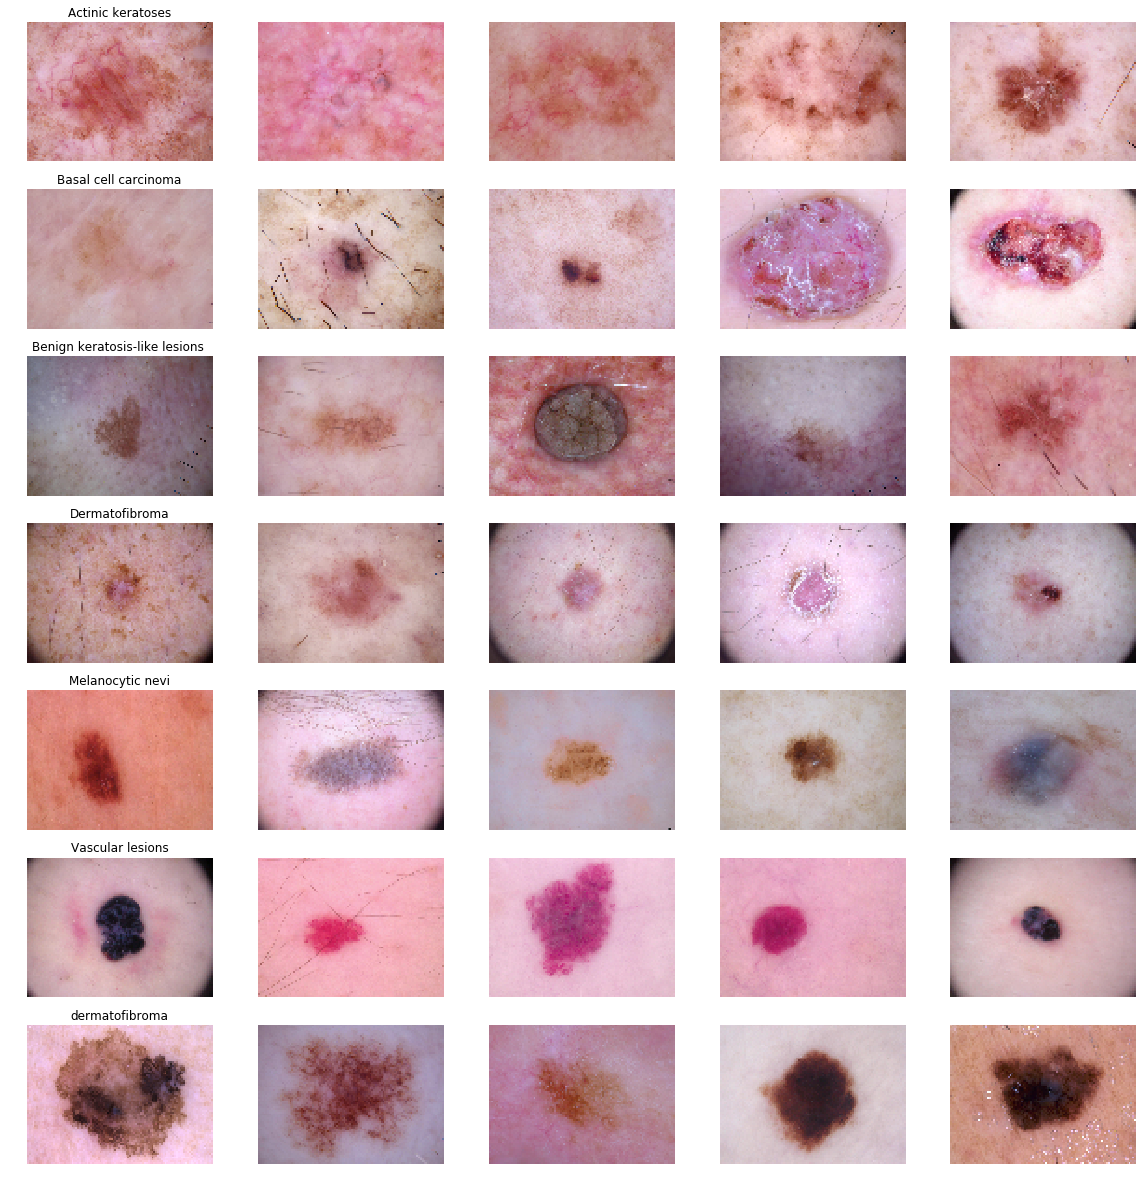

In [56]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         tile_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('skin_samples.png', dpi=300)

In [57]:
# Checking the image size distribution
tile_df['image'].map(lambda x: x.shape).value_counts()

(75, 100, 3)    10015
Name: image, dtype: int64

In [58]:
features=tile_df.drop(columns=['cell_type_idx'],axis=1)
target=tile_df['cell_type_idx']

In [59]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.20,random_state=1234)

In [60]:
# normalizing the train and test sets by subtracting the mean values and dividing by the standard deviation
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [61]:
# Perform one-hot encoding on the labels
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

In [62]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

In [63]:
# Reshape image in 3 dimensions (height = 75px, width = 100px , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(75, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(75, 100, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(75, 100, 3))

## Building the Model

In [66]:
# CNN model
input_shape = (75, 100, 3)
num_classes = 7
batch_size = 128
epochs = 30

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

# model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
# model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.40))

# model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# model.summary()

Instructions for updating:
Use tf.cast instead.
Train on 7210 samples, validate on 2003 samples
Epoch 1/12
7210/7210 [==============================] - 283s 39ms/step - loss: 1.7377 - acc: 0.6366 - val_loss: 1.0543 - val_acc: 0.6585
Epoch 2/12
7210/7210 [==============================] - 264s 37ms/step - loss: 0.9545 - acc: 0.6761 - val_loss: 0.8738 - val_acc: 0.6660
Epoch 3/12
7210/7210 [==============================] - 246s 34ms/step - loss: 0.8826 - acc: 0.6853 - val_loss: 0.8756 - val_acc: 0.6655
Epoch 4/12
7210/7210 [==============================] - 251s 35ms/step - loss: 0.8410 - acc: 0.7079 - val_loss: 0.8415 - val_acc: 0.6955
Epoch 5/12
7210/7210 [==============================] - 243s 34ms/step - loss: 0.7799 - acc: 0.7219 - val_loss: 0.8193 - val_acc: 0.6875
Epoch 6/12
7210/7210 [==============================] - 238s 33ms/step - loss: 0.7380 - acc: 0.7430 - val_loss: 0.7401 - val_acc: 0.7219
Epoch 7/12
7210/7210 [==============================] - 247s 34ms/step - loss: 0.6